In [34]:
%env CUDA_VISIBLE_DEVICES=1
import numpy as np
import jax.numpy as jnp
from matplotlib import pyplot as plt
# from wandb.apis.importers.mlflow import MlflowImporter
import wandb
api = wandb.Api()

env: CUDA_VISIBLE_DEVICES=1


In [35]:
runs = dict()
runs['latent-DiT-Ti'] = api.run("xnf/mt3_res256/rj2u669g") # 10-55
runs['latent-DiT-S'] = api.run("xnf/mt3_res256/3ezaquc9") # 28-33
runs['latent-DiT-B'] = api.run("xnf/mt3_res256/caxj2d6b") # 50-52

# runs['latent-SSM-Ti'] = api.run("xnf/mt3_res256/v3448wyo") # 03-43
# runs['latent-SSM-S'] = api.run("xnf/mt3_res256/hh2mn98b")  # 24-12
# runs['latent-SSM-B'] = 

# runs['pixel-DiT-S'] = api.run("xnf/mt3_res256/ix8k3gl7") 
# runs['pixel-DiT-Ti'] = api.run("xnf/mt3_res256/w6wrld4j") 
runs["pixel-TTT-Ti"] = api.run("xnf/mt3_res256/71w6drkf") # 05-11-cfg1.5
runs["pixel-TTT-S"] = api.run("xnf/mt3_res256/pz2638mv") # 31-44-cfg1.5
runs["pixel-TTT-B"] = api.run("xnf/mt3_res256/2jyp5x5s") # 25-38-cfg1.5
# runs["pixel-TTT-B"] = api.run("xnf/mt3_res256/rvczbxhh") # 25-38-cfg3.0

# runs['pixel-TTT-Ti'] = api.run("xnf/mt3_res256/6mt28ha7") # 54-58
# runs['pixel-TTT-S'] = api.run("xnf/mt3_res256/fi5i3moa") # 08-40
# runs['pixel-TTT-B'] = api.run("xnf/mt3_res256/1q1z1z1z") # 41-15

In [36]:
data = []
for name, run in runs.items():
    d = dict()
    d['mode'], d['model'], d['size'] = name.split('-')
    history = run.history().sort_values('eval-10000-50/train_flops_TFlops')
    d['tflops'] = np.array(history['eval-10000-50/train_flops_TFlops'])
    d['fid'] = np.array(history['eval-10000-50/fid'])
    d['step'] = np.array(history['ckpt_step'])
    data.append(d)

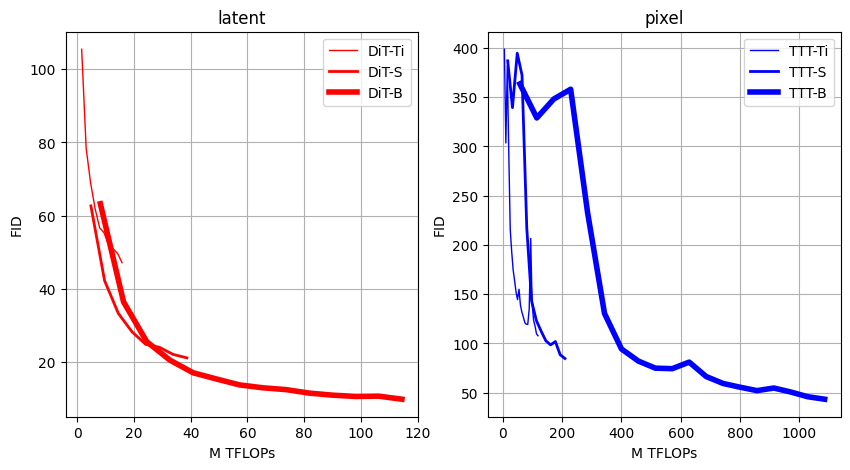

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for d in data:
    if d['mode'] == 'latent':i = 0
    else: i = 1

    if d['model'] == 'DiT': linecolor = 'r'
    elif d['model'] == 'SSM': linecolor = 'g'
    else: linecolor = 'b'
    label = "%s-%s" % (d['model'], d['size'])
    match d['size']:
        case "Ti":  linewidth = 1
        case 'S':   linewidth = 2
        case "B":   linewidth = 4
        case _:     linewidth = 8
    axs[i].plot(d['tflops']/1e6, d['fid'], color=linecolor, linewidth=linewidth, label=label)
    axs[i].set_title(d['mode'])

for i in range(2):
    axs[i].legend()
    axs[i].set_xlabel('M TFLOPs')
    axs[i].set_ylabel('FID')
    # axs[i].set_ylim(0, 140)
    axs[i].grid()
plt.show()

In [40]:
import numpy as np

output_data = {}
for d in data:
    name = "%s-%s-%s" % (d['mode'], d['model'], d['size'])
    output_data[name] = {
        "tflops": d["tflops"],
        "fid": d["fid"],
        "step": d["step"]
    }

np.save("model_fid.npy", output_data)

In [41]:
!ls model_fid.npy
!pwd

model_fid.npy
/home/guandaoyang/jax-DiT/plots


In [43]:
import numpy as np
output_data = np.load("model_fid.npy", allow_pickle=True).item()
output_data

{'latent-DiT-Ti': {'tflops': array([ 1580908.125,  3161816.25 ,  4742724.5  ,  6323632.5  ,
          7904540.5  ,  9485449.   , 11066357.   , 12647265.   ,
         14228173.   , 15809065.   ,          nan,          nan,
                  nan]),
  'fid': array([105.51649958,  78.41966491,  68.84465869,  61.90448778,
          56.67228583,  55.24916675,  51.94511353,  50.90309155,
          49.6684922 ,  47.09858101,          nan,          nan,
                  nan]),
  'step': array([100000., 200000., 300000., 400000., 500000., 600000., 700000.,
         800000., 900000., 999999.,     nan,     nan,     nan])},
 'latent-DiT-S': {'tflops': array([ 4832570.5,  9665141. , 14497712. , 19330282. , 24162854. ,
         28995424. , 33827996. , 38660564. ,        nan,        nan,
                nan]),
  'fid': array([62.63945574, 42.16293383, 33.23331628, 28.18101888, 24.73904066,
         23.93781854, 21.99808916, 21.06147755,         nan,         nan,
                 nan]),
  'step': arra

# Fitting Scaling Law for each Model Class

TTT B pixel
[ 10000.  20000.  30000.  40000.  50000.  60000.  70000.  80000.  90000.
 100000. 110000. 120000. 130000. 140000. 150000. 160000. 170000. 180000.
 190000.] [ 9.2103405  9.903487  10.308952  10.596635  10.819778  11.0021
 11.156251  11.289782  11.407565  11.512925  11.608235  11.695247
 11.77529   11.849398  11.91839   11.982929  12.043553  12.100712
 12.154779 ]
[[-0.89564395]] [14.709303]
[363.50081846 328.95971755 348.11460879 358.08681092 232.84050862
 130.46159813  94.45416529  82.11959734  74.95719874  74.43701043
  81.10667749  66.49457293  59.39899078  55.6280385   52.15058182
  54.77162463  50.72364821  45.95365481  43.41909518] [5.8957815 5.795935  5.852532  5.8807755 5.4503536 4.871079  4.548115
 4.408177  4.3169174 4.309953  4.3957653 4.19712   4.084277  4.0186872
 3.9541354 4.0031724 3.9263923 3.8276334 3.7708993]


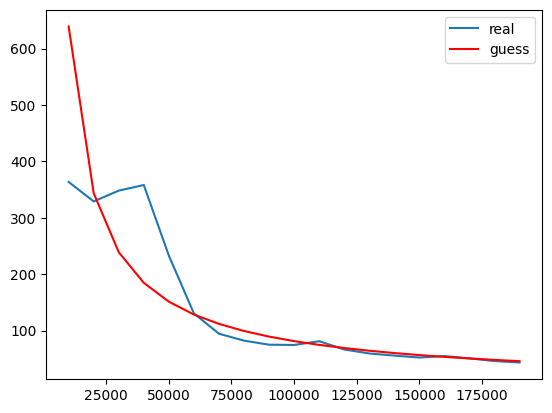

In [101]:
from sklearn.linear_model import LinearRegression


ex_run_data = data[7]
# xs = jnp.array(ex_run_data["tflops"][:-3])
print(ex_run_data["model"], ex_run_data["size"], ex_run_data["mode"])
xs = jnp.array(ex_run_data["ckpt"])[:-3]
log_xs = jnp.log(xs)
print(xs, log_xs)
ys = ex_run_data["fid"][:-3]
log_ys = jnp.log(ys)

# Fit Linear Regression
reg = LinearRegression().fit(log_xs.reshape(-1, 1), log_ys.reshape(-1, 1))
print(reg.coef_, reg.intercept_)
def guess(x):
    a = jnp.exp(reg.intercept_)
    alpha = reg.coef_[0][0]
    return a * x ** alpha 
ys_ = guess(xs)

print(ys, log_ys)
plt.figure()
plt.plot(xs, ys, label='real')    
plt.plot(xs, ys_, 'r', label='guess')   
plt.legend()
plt.show()


[[-0.89564395]] [14.709303]
{'params': {'scale': Array([14.709303], dtype=float32), 'l_inf': Array([-10.], dtype=float32), 'alpha': Array([-0.11021232], dtype=float32)}} FIDModel(
    # attributes
    unit = 1
    offset = 0
    scale_init = array([14.709303], dtype=float32)
    alpha_init = Array(-0.11021232, dtype=float32)
    l_inf_init = -10.0
) [2444382.]


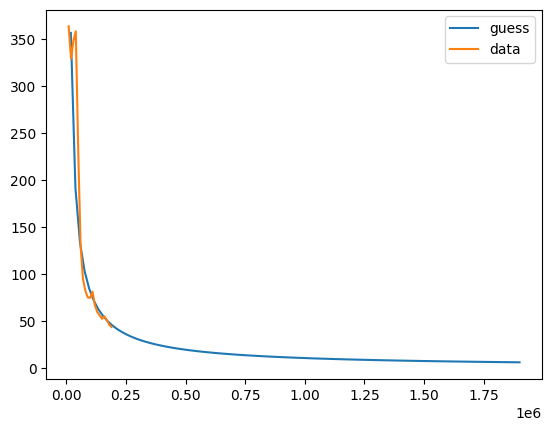

In [102]:
import jax.numpy as jnp
import jax
import flax.linen as nn

class FIDModel(nn.Module):
    unit: float = 1
    offset: float = 0
    
    scale_init: float = 0.
    alpha_init: float = 0.
    l_inf_init: float = -10. # small value
    
    @nn.compact
    def __call__(self, x):
        x = x / self.unit + self.offset
        scale = self.param('scale', nn.initializers.constant(self.scale_init), (1,))
        l_inf = self.param('l_inf', nn.initializers.constant(self.l_inf_init), (1,))
        alpha = self.param('alpha', nn.initializers.constant(self.alpha_init), (1,))
        return jnp.exp(scale) * x  ** (-jnp.exp(alpha)) + jnp.exp(l_inf)
    
reg = LinearRegression().fit(jnp.log(xs).reshape(-1, 1), jnp.log(ys).reshape(-1, 1))
print(reg.coef_, reg.intercept_)

model = FIDModel(
    alpha_init=jnp.log(-reg.coef_[0][0]),
    scale_init=reg.intercept_, 
)
params = model.init(jax.random.PRNGKey(0), jnp.array([1.0]))
out = model.apply(params, jnp.array([1.0]))
print(params, model, out)

xs_ = jnp.linspace(0, xs.max() * 10, 100)
ys_ = model.apply(params, xs_)
plt.plot(xs_, ys_, label="guess")
plt.plot(xs, ys, label="data")
# plt.xscale('log')
# plt.yscale('log')
plt.legend()

[[-0.89564395]] [14.709303]
(Before) Objective function:  0.06259744
Iteration 0, loss=0.46584662795066833 params={'params': {'alpha': Array([-0.01021188], dtype=float32), 'l_inf': Array([-10.085363], dtype=float32), 'scale': Array([14.609157], dtype=float32)}} lr=0.10000000149011612
Iteration 1000, loss=0.04628545418381691 params={'params': {'alpha': Array([-0.22908449], dtype=float32), 'l_inf': Array([-7.4158854], dtype=float32), 'scale': Array([13.498714], dtype=float32)}} lr=0.05000000074505806
Iteration 2000, loss=0.04628434777259827 params={'params': {'alpha': Array([-0.22793637], dtype=float32), 'l_inf': Array([-8.240225], dtype=float32), 'scale': Array([13.50888], dtype=float32)}} lr=0.02500000037252903
Iteration 3000, loss=0.04628428816795349 params={'params': {'alpha': Array([-0.22781001], dtype=float32), 'l_inf': Array([-8.64348], dtype=float32), 'scale': Array([13.510029], dtype=float32)}} lr=0.012500000186264515
Iteration 4000, loss=0.0462842658162117 params={'params': {'a

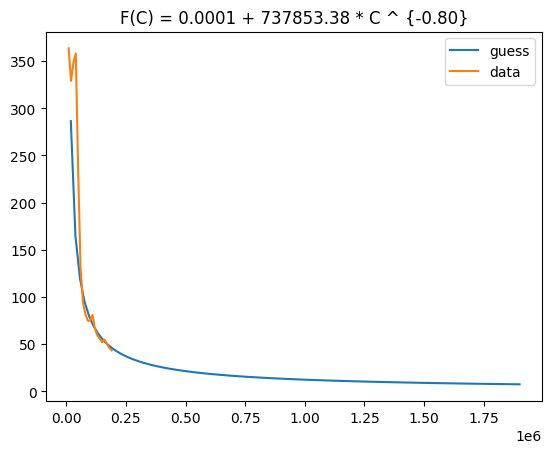

In [103]:
import optax
import jax
import jax.numpy as jnp

def create_fid_model(xs, ys, niters=10_000, eps=1e-6, lr=0.1):
  # estimate the rough parameters
  
  reg = LinearRegression().fit(
    jnp.log(xs).reshape(-1, 1), jnp.log(ys).reshape(-1, 1))
  # reg.coef_ = -alpha, alpha_init = jnp.log(-reg.coef_)
  # reg.intercept_ = log(a), scale_init = reg.intercept_
  print(reg.coef_, reg.intercept_)
  fid_model = FIDModel(
    alpha_init=jnp.log(-reg.coef_[0][0]),
    scale_init=reg.intercept_, 
  )
  params = fid_model.init(jax.random.PRNGKey(0), jnp.array([1.0]))

  def loss(params):
    y_ = fid_model.apply(params, xs)
    # return jnp.mean(jnp.square(ys - y_))
    return jnp.mean(jnp.square(ys - y_) / (jnp.square(ys) + eps))
  
  @jax.jit 
  def step(params, opt_state):
    value, grad = jax.value_and_grad(loss)(params)
    updates, opt_state = solver.update(grad, opt_state, params)
    params = optax.apply_updates(params, updates)
    return params, opt_state, value
  print('(Before) Objective function: ', loss(params))

  lr_sch = lambda t: lr * 0.5 ** jnp.floor(t / float(interval))
  interval = niters // 10
  solver = optax.adamw(lr_sch)
  opt_state = solver.init(params)
  for i in range(niters):
    params, opt_state, _ = step(params, opt_state)
    if i % interval == 0:
      value = loss(params)
      print(f'Iteration {i}, loss={value} params={params} lr={lr_sch(i)}')
  print('(Final) Objective function: ', loss(params))
  print("Equation: F(C) = %.2e + %.2e * C ** %.2f" 
        % (float(jnp.exp(params["params"]["l_inf"][0])), 
           float(jnp.exp(params["params"]["scale"][0])), 
           float(-jnp.exp(params["params"]["alpha"][0]))))
  eq = "F(C) = %.4f + %.2f * C ^ {%.2f}" % (
    float(jnp.exp(params["params"]["l_inf"][0])), 
    float(jnp.exp(params["params"]["scale"][0])), 
    float(-jnp.exp(params["params"]["alpha"][0])))
  return params, fid_model, eq

params, fid_model, eq = create_fid_model(xs, ys)

xs_ = jnp.linspace(0, xs.max() * 10, 100)
ys_ = model.apply(params, xs_)
plt.plot(xs_, ys_, label="guess")
plt.plot(xs, ys, label="data")
plt.title(eq)
# plt.xscale('log')
# plt.yscale('log')
plt.legend()

[ 10000.  20000.  30000.  40000.  50000.  60000.  70000.  80000.  90000.
 100000. 110000. 120000. 130000.     nan     nan     nan] [386.91539477 339.42824534 394.68384861 372.43065011 217.1234482
 143.42647422 123.46198477 112.59989956 102.73071259  98.59880808
 101.97017281  88.56505928  84.75573111          nan          nan
          nan]
TTT S pixel
[ 50000.  60000.  70000.  80000.  90000. 100000. 110000. 120000. 130000.] [217.1234482  143.42647422 123.46198477 112.59989956 102.73071259
  98.59880808 101.97017281  88.56505928  84.75573111]
[[-0.84476984]] [14.338849]
(Before) Objective function:  0.007546313
Iteration 0, loss=0.44838276505470276 params={'params': {'alpha': Array([-0.06869005], dtype=float32), 'l_inf': Array([-10.037532], dtype=float32), 'scale': Array([14.238707], dtype=float32)}} lr=0.10000000149011612
Iteration 1000, loss=0.0071144262328743935 params={'params': {'alpha': Array([-0.16580005], dtype=float32), 'l_inf': Array([2.172272], dtype=float32), 'scale': Array

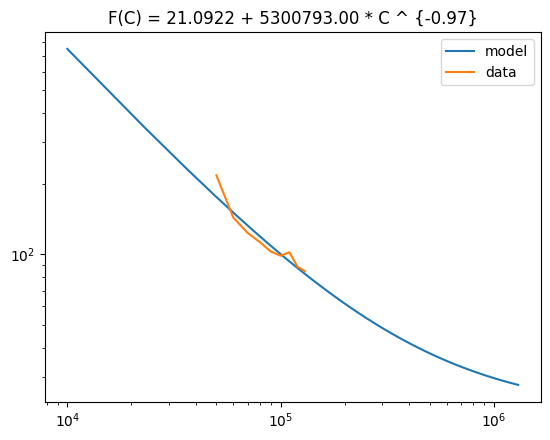

In [105]:
# TODO: filter the array to remove the NaN values
def make_data(ex_run_data):
    print(ex_run_data["model"], ex_run_data["size"], ex_run_data["mode"])
    # xs = jnp.array(ex_run_data["tflops"])
    xs = np.array(ex_run_data["ckpt"])
    idxs = []
    for i in range(xs.shape[0]):
        if jnp.any(jnp.isnan(xs[i])): continue
        if xs[i] < 50000: continue
        idxs.append(i)
    xs = xs[idxs] 
    ys = np.array(ex_run_data["fid"])
    ys = ys[idxs]
    return xs, ys

ex_run_data = data[6]
xs = jnp.array(ex_run_data["ckpt"])
ys = ex_run_data["fid"]
print(xs, ys)
xs, ys = make_data(ex_run_data)
print(xs, ys)
# xs = xs[1:]
# ys = ys[1:]

params, fid_model, eq = create_fid_model(xs, ys, lr=0.1)
xs_ = jnp.linspace(10000, xs.max() * 10, 100)
ys_ = fid_model.apply(params, xs_)
plt.plot(xs_, ys_, label="model")
plt.plot(xs, ys, label="data")
plt.title(eq)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# Fitting data

pixel-TTT-Ti
TTT Ti pixel
[[-0.32593173]] [8.797918]
(Before) Objective function:  0.013061172
Iteration 0, loss=0.15779991447925568 params={'params': {'alpha': Array([-1.0210568], dtype=float32), 'l_inf': Array([-10.058867], dtype=float32), 'scale': Array([8.697831], dtype=float32)}} lr=0.10000000149011612
Iteration 1000, loss=0.012505014427006245 params={'params': {'alpha': Array([-1.0471286], dtype=float32), 'l_inf': Array([-9.879961], dtype=float32), 'scale': Array([9.072363], dtype=float32)}} lr=0.05000000074505806
Iteration 2000, loss=0.012504616752266884 params={'params': {'alpha': Array([-1.0441482], dtype=float32), 'l_inf': Array([-8.782648], dtype=float32), 'scale': Array([9.084727], dtype=float32)}} lr=0.02500000037252903
Iteration 3000, loss=0.012483835220336914 params={'params': {'alpha': Array([-1.0231769], dtype=float32), 'l_inf': Array([1.6794027], dtype=float32), 'scale': Array([9.132812], dtype=float32)}} lr=0.012500000186264515
Iteration 4000, loss=0.0124215893447399

/tmp/ipykernel_504498/2883156616.py:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 150)


Iteration 2000, loss=0.014629261568188667 params={'params': {'alpha': Array([0.04740887], dtype=float32), 'l_inf': Array([2.3324556], dtype=float32), 'scale': Array([16.262001], dtype=float32)}} lr=0.02500000037252903
Iteration 3000, loss=0.01445682905614376 params={'params': {'alpha': Array([0.07382637], dtype=float32), 'l_inf': Array([2.4664176], dtype=float32), 'scale': Array([16.56094], dtype=float32)}} lr=0.012500000186264515
Iteration 4000, loss=0.014307527802884579 params={'params': {'alpha': Array([0.09645253], dtype=float32), 'l_inf': Array([2.5660806], dtype=float32), 'scale': Array([16.823788], dtype=float32)}} lr=0.0062500000931322575
Iteration 5000, loss=0.014182748273015022 params={'params': {'alpha': Array([0.11519944], dtype=float32), 'l_inf': Array([2.64026], dtype=float32), 'scale': Array([17.04644], dtype=float32)}} lr=0.0031250000465661287
Iteration 6000, loss=0.014079985208809376 params={'params': {'alpha': Array([0.13053603], dtype=float32), 'l_inf': Array([2.6961

/tmp/ipykernel_504498/2883156616.py:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 150)


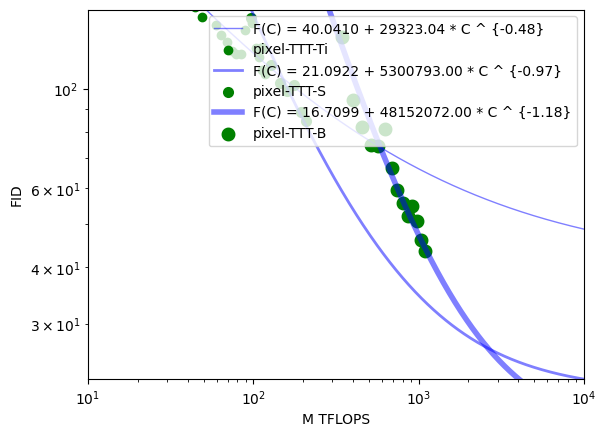

In [100]:
model_type = "pixel"
scaling_data = {}
for ex_run_data in data:
    # if ex_run_data["mode"] not in ["latent"] or ex_run_data["model"] not in ["DiT"] or ex_run_data["size"] not in ["Ti", "S", "B"]:
    # if ex_run_data["mode"] not in ["latent"] or ex_run_data["model"] not in ["DiT"] or ex_run_data["size"] not in ["Ti", "S"]:
    # if ex_run_data["mode"] not in ["latent"] or ex_run_data["model"] not in ["DiT"] or ex_run_data["size"] not in ["S", "B"]:
    # if ex_run_data["mode"] not in ["latent"] or ex_run_data["model"j not in ["DiT"] or ex_run_data["size"] not in ["Ti", "B"]:
    if ex_run_data["mode"] not in [model_type] or ex_run_data["model"] not in ["TTT"] or ex_run_data["size"] not in ["S", "B", "Ti"]:
        continue
    name = ex_run_data["mode"] + "-" + ex_run_data["model"] + "-" + ex_run_data["size"]
    print(name)
    xs, ys = make_data(ex_run_data)
    params, fid_model, eq = create_fid_model(xs, ys)
    print(eq)
    flops_per_iter = ex_run_data["tflops"][0] / float(ex_run_data["ckpt"][0]) / 1e6
    max_flops = 1000 if model_type == "latent" else 10_000
    max_steps = max_flops / flops_per_iter
    
    xs_ = jnp.linspace(1, max_steps, 1000)
    ys_ = fid_model.apply(params, xs_)
    
    match ex_run_data['size']:
        case 'Ti':  linewidth = 1
        case 'S':   linewidth = 2
        case 'B':   linewidth = 4
        case _:     linewidth = 8
    plt.plot(xs_ * flops_per_iter, ys_, c="b", label=eq, linewidth=linewidth, 
             alpha=0.5)
    plt.scatter(xs  * flops_per_iter, ys,  c="g", label=name, linewidth=linewidth)
    plt.xlabel("M TFLOPS")
    plt.ylabel("FID")
    plt.xlim(10, max_flops)
    plt.ylim(0, 150)
    plt.xscale("log")
    plt.yscale("log")
    
    scaling_data[name] = {
        "params": params,
        "fid_model": fid_model,
        "xs": xs,
        "ys": ys,
        "flops_per_iter": flops_per_iter,
    }
plt.legend()


# Compute the Scaling Property

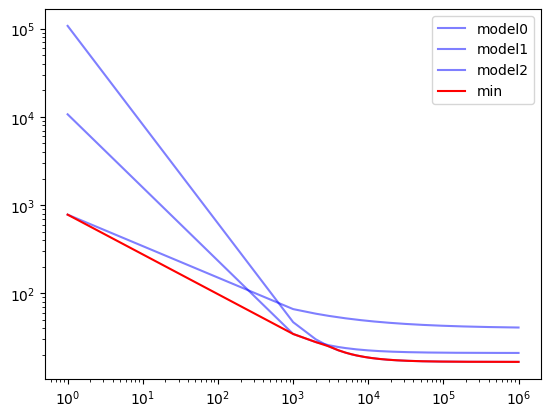

In [106]:
def min_flop_to_fid_curve(scaling_data, min_flops=10000, max_flops=1000000):
    xs = jnp.linspace(1, max_flops, 1000)
    ys_lst = []
    for name, data in scaling_data.items():
        flops_per_iter = data["flops_per_iter"]
        ys_ = data["fid_model"].apply(data["params"], xs / flops_per_iter)
        ys_lst.append(ys_)
    ys_lst = jnp.array(ys_lst)
    return xs, ys_lst

xs, ys_lst = min_flop_to_fid_curve(scaling_data)
for i in range(ys_lst.shape[0]):
    plt.plot(xs, ys_lst[i], c="b", alpha=0.5, label=f"model{i}")
plt.plot(xs, ys_lst.min(axis=0), c="r", label="min")
plt.legend()
plt.xscale("log")
plt.yscale("log")

# for name, data in scaling_data.items():
#     params, fid_model = data["params"], data["fid_model"]
#     scaling_data[name] = {
#         "params": params,
#         "fid_model": fid_model,
#         "xs": xs,
#         "ys": ys,
#     }
# plt.legend()


[[-0.14390391]] [4.389797]
(Before) Objective function:  0.007256553
Iteration 0, loss=0.05536098778247833 params={'params': {'alpha': Array([-1.8385909], dtype=float32), 'l_inf': Array([-10.0763], dtype=float32), 'scale': Array([4.289754], dtype=float32)}} lr=0.10000000149011612
Iteration 1000, loss=0.003886033548042178 params={'params': {'alpha': Array([-1.2708182], dtype=float32), 'l_inf': Array([2.5172775], dtype=float32), 'scale': Array([4.5731664], dtype=float32)}} lr=0.05000000074505806
Iteration 2000, loss=0.0009890252258628607 params={'params': {'alpha': Array([-0.51645654], dtype=float32), 'l_inf': Array([2.7345066], dtype=float32), 'scale': Array([6.908508], dtype=float32)}} lr=0.02500000037252903
Iteration 3000, loss=0.0009889689972624183 params={'params': {'alpha': Array([-0.51627237], dtype=float32), 'l_inf': Array([2.7347844], dtype=float32), 'scale': Array([6.9094367], dtype=float32)}} lr=0.012500000186264515
Iteration 4000, loss=0.0009889674838632345 params={'params': 

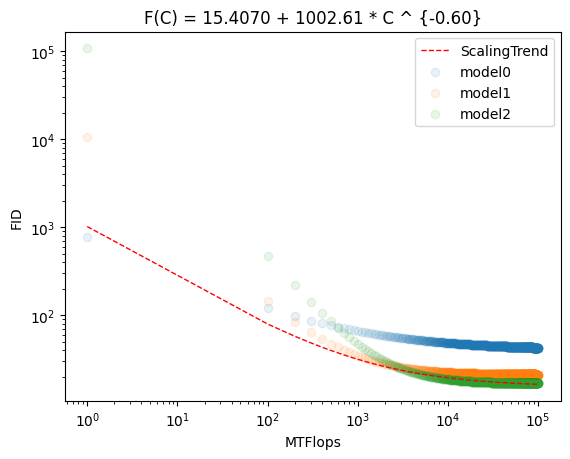

$F(C) = 15.4070 + 1002.61 * C ^ {-0.60}$


In [108]:
xs, ylst = min_flop_to_fid_curve(scaling_data, min_flops=1_000, max_flops=100_000)
ys = ylst.min(axis=0)
s_params, scaling_model, eq = create_fid_model(xs, ys)
title = eq
plt.title(title)
plt.plot(xs, scaling_model.apply(s_params, xs), 
         c="red", label="ScalingTrend", linewidth=1, linestyle="dashed")
for i in range(ylst.shape[0]):
    plt.scatter(xs, ylst[i], label="model%d" % i, alpha=0.1, linewidth=1, s=1)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("FID")
plt.xlabel("MTFlops")
plt.legend()
plt.show()

print("$%s$" % title)